# Data Wrangling with Pandas



In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## Date/Time data handling


In [8]:
from datetime import datetime

In [9]:
now = datetime.now()
now

datetime.datetime(2020, 11, 18, 0, 47, 54, 699554)

In [10]:
now.day

18

In [11]:
now.weekday()

2

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [12]:
from datetime import date, time

In [13]:
time(12, 17)

datetime.time(12, 17)

In [14]:
date(1998, 8, 14)

datetime.date(1998, 8, 14)

In [15]:
my_age = now - datetime(1998, 8, 14)
my_age

datetime.timedelta(days=8132, seconds=2874, microseconds=699554)

In [16]:
my_age.days/365.

22.279452054794522

In [20]:
segments = pd.read_csv("F:\statistical-analysis-python-tutorial-master\data\AIS/transit_segments.csv")

segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  

For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

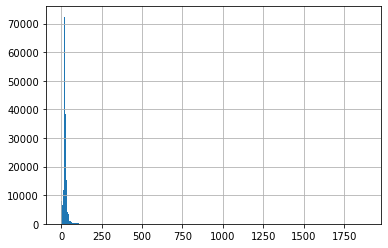

In [21]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

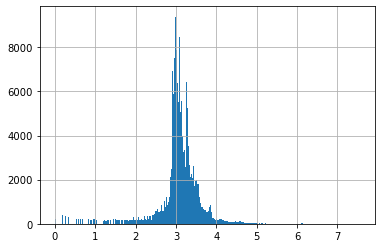

In [22]:
segments.seg_length.apply(np.log).hist(bins=500)

In [23]:
segments.st_time.dtype

dtype('O')

In [16]:
from dateutil.parser import parse

In [17]:
parse(segments.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [18]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
...
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [19]:
pd.to_datetime(segments.st_time)

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
...
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [20]:
pd.to_datetime([None])

<class 'pandas.tseries.index.DatetimeIndex'>
[NaT]
Length: 1, Freq: None, Timezone: None

## Merging and joining DataFrame objects

In [21]:
vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [22]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [23]:
vessels.type.value_counts()

Cargo        5622
Tanker       2440
Pleasure      601
Tug           221
Sailing       205
Fishing       200
Other         178
Passenger     150
Towing        117
Unknown       106
...
BigTow/Tanker/Towing/Tug          1
Fishing/SAR/Unknown               1
BigTow/Reserved/Towing/Tug/WIG    1
Reserved/Tanker/Towing/Tug        1
Cargo/Reserved/Unknown            1
Reserved/Towing/Tug               1
BigTow/Unknown                    1
Fishing/Law                       1
BigTow/Towing/WIG                 1
Towing/Unknown/WIG                1
AntiPol/Fishing/Pleasure          1
Length: 206, dtype: int64

The challenge, however, is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. The table of vessel information has a *one-to-many* relationship with the segments.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [24]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=range(3)+range(3), score=np.random.random(size=6)))

df1, df2

(   age  id
 0   24   0
 1   25   1
 2   25   2
 3   30   3,    id     score
 0   0  0.068840
 1   1  0.784715
 2   2  0.590726
 3   0  0.892117
 4   1  0.506912
 5   2  0.721110)

In [25]:
pd.merge(df1, df2)

   age  id     score
0   24   0  0.068840
1   24   0  0.892117
2   25   1  0.784715
3   25   1  0.506912
4   25   2  0.590726
5   25   2  0.721110

Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [26]:
pd.merge(df1, df2, how='outer')

   age  id     score
0   24   0  0.068840
1   24   0  0.892117
2   25   1  0.784715
3   25   1  0.506912
4   25   2  0.590726
5   25   2  0.721110
6   30   3       NaN

The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [27]:
segments.head(1)

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  

In [28]:
vessels.head(1)

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1         156          4  Dredging/MilOps/Reserved/Towing  

we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [29]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [30]:
segments_merged.head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   

   num_types                             type  \
0          4  Dredging/MilOps/R

In [31]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0      156   

   num_types                             type  \
0          4  Dredging/MilOps/R

In [1]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

NameError: name 'segments' is not defined

In [2]:
np.concatenate([np.random.random(5), np.random.random(5)])

NameError: name 'np' is not defined

In [34]:
np.r_[np.random.random(5), np.random.random(5)]

array([ 0.80586099,  0.34971419,  0.39173205,  0.61992008,  0.64169057,
        0.31249921,  0.97907553,  0.18102001,  0.67703841,  0.25629399])

In [35]:
np.c_[np.random.random(5), np.random.random(5)]

array([[ 0.40759603,  0.66875812],
       [ 0.75010699,  0.64254533],
       [ 0.19492038,  0.04028105],
       [ 0.139481  ,  0.96799951],
       [ 0.81245418,  0.83274143]])

In [36]:
mb1 = pd.read_excel('data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [37]:
mb1.head()

                                                                                         1
0                                                                                         
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera    7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus          2
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus              3
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum          3
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella  7

Let's give the index and columns meaningful labels:

In [38]:
mb1.columns = mb2.columns = ['Count']

In [39]:
mb1.index.name = mb2.index.name = 'Taxon'

In [40]:
mb1.head()

                                                                                         Count
Taxon                                                                                         
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7

In [41]:
mb1.index[:3]

Index([u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera', u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus', u'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'], dtype='object')

In [42]:
mb1.index.is_unique

True

In [43]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

In [44]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

In [45]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [46]:
pd.concat([mb1, mb2], axis=1).head()

                                                                                            Count  \
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                    NaN   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera               NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera           7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus    NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera       NaN   

                                                                                            Count  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                      2  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                14  
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        

In [47]:
pd.concat([mb1, mb2], axis=1).values[:5]

array([[ nan,   2.],
       [ nan,  14.],
       [  7.,  23.],
       [ nan,   1.],
       [ nan,   2.]])

In [48]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

                                                                                         Count  \
Taxon                                                                                            
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3   
Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3   
Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7   

                                                                                         Count  
Taxon                                                                                           
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera       23  
Archaea "Crenarchaeota

In [49]:
mb1.combine_first(mb2).head()

                                                                                            Count
Taxon                                                                                            
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                      2
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                14
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera           7
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus      1
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera         2

In [50]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

                                                                                                  Count
         Taxon                                                                                         
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera        7
         Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus              2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus                  3
         Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum              3
         Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella      7

In [51]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

In [52]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

                                                                                            patient1  \
                                                                                               Count   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae Acidilobus                       NaN   
Archaea "Crenarchaeota" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera                  NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera              7   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus       NaN   
Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera          NaN   

                                                                                            patient2  
                                                                                               Count  
Archaea "Crenarchaeota" Thermoprotei Acidilobales Acidilobaceae A

## Exercise

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [52]:
# Write your answer here

## Reshaping DataFrame objects



In [53]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

The `stack` method rotates the data frame so that columns are represented in rows:

In [54]:
stacked = cdystonia.stack()
stacked

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
...
629  sex            M
     twstrs        36
630  patient      109
     obs            6
     week          16
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [55]:
stacked.unstack().head()

  patient obs week site id  treat age sex twstrs
0       1   1    0    1  1  5000U  65   F     32
1       1   2    2    1  1  5000U  65   F     30
2       1   3    4    1  1  5000U  65   F     24
3       1   4    8    1  1  5000U  65   F     37
4       1   5   12    1  1  5000U  65   F     39

For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [56]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [57]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [58]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs       1   2   3   4   5   6
patient                        
1        32  30  24  37  39  36
2        60  26  27  41  65  67
3        44  20  23  26  35  35
4        53  61  64  62 NaN NaN
5        53  35  48  49  41  51

In [59]:
cdystonia_long = cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().merge(
                    twstrs_wide, right_index=True, left_on='patient', how='inner').head()
cdystonia_long

    patient  site  id    treat  age sex   1   2   3   4   5   6
0         1     1   1    5000U   65   F  32  30  24  37  39  36
6         2     1   2   10000U   70   F  60  26  27  41  65  67
12        3     1   3    5000U   64   F  44  20  23  26  35  35
18        4     1   4  Placebo   59   F  53  61  64  62 NaN NaN
22        5     1   5   10000U   76   F  53  35  48  49  41  51

A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [60]:
cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs'].unstack('week').head()

week                             0   2   4   8   12  16
patient site id treat   age sex                        
1       1    1  5000U   65  F    32  30  24  37  39  36
2       1    2  10000U  70  F    60  26  27  41  65  67
3       1    3  5000U   64  F    44  20  23  26  35  35
4       1    4  Placebo 59  F    53  61  64  62 NaN NaN
5       1    5  10000U  76  F    53  35  48  49  41  51

To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized:

In [61]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

   patient  site  id    treat  age sex obs  twsters
0        1     1   1    5000U   65   F   1       32
1        2     1   2   10000U   70   F   1       60
2        3     1   3    5000U   64   F   1       44
3        4     1   4  Placebo   59   F   1       53
4        5     1   5   10000U   76   F   1       53

In [62]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs       1   2   3   4   5   6
patient                        
1        32  30  24  37  39  36
2        60  26  27  41  65  67
3        44  20  23  26  35  35
4        53  61  64  62 NaN NaN
5        53  35  48  49  41  51

In [63]:
cdystonia.pivot('patient', 'obs')

         week                      site             ...  sex                 \
obs         1   2   3   4   5   6     1   2   3   4 ...    3    4    5    6   
patient                                             ...                       
1           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
2           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
3           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
4           0   2   4   8 NaN NaN     1   1   1   1 ...    F    F  NaN  NaN   
5           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
6           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
7           0   2   4   8  12  16     1   1   1   1 ...    M    M    M    M   
8           0   2   4   8  12  16     1   1   1   1 ...    M    M    M    M   
9           0   2   4   8  12  16     1   1   1   1 ...    F    F    F    F   
10          0   2   4   8  12  16     1   1   1   1 

In [2]:
pd.crosstab(cdystonia.sex, cdystonia.site)

NameError: name 'pd' is not defined

## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" that include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [3]:
vessels.duplicated(cols='names')

NameError: name 'vessels' is not defined

In [67]:
vessels.drop_duplicates(['names'])

           num_names                                              names sov  \
mmsi                                                                          
1                  8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9                  3                         000000009/Raven/Shearwater   N   
21                 1                                      Us Gov Vessel   Y   
74                 2                                  Mcfaul/Sarah Bell   N   
103                3           Ron G/Us Navy Warship 103/Us Warship 103   Y   
310                1                                           Arabella   N   
3011               1                                         Charleston   N   
4731               1                                          000004731   N   
15151              2                             R L Enterkin/Us Vessel   N   
46809              1                                      Island Trader   N   
80404              1                                

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [68]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [69]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [70]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    2
8    2
9    2
...
620    2
621    2
622    2
623    2
624    2
625    2
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [71]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0             0
1             1
2          1024
3         59049
4       1048576
5       9765625
6      60466176
7     282475249
8    1073741824
9    3486784401
dtype: float64

In [72]:
np.log(vals)

0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [73]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [74]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
...
108      1      2
         2      2
         3      2
         4      2
         5      2
         6      2
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

In [75]:
top5 = vessels.type.apply(lambda s: s in vessels.type.value_counts().index[:5])
vessels5 = vessels[top5]

In [76]:
pd.get_dummies(vessels5.type).head(10)

         Cargo  Pleasure  Sailing  Tanker  Tug
mmsi                                          
15151        0         0        0       0    1
80404        0         1        0       0    0
366235       1         0        0       0    0
587370       0         0        0       0    1
693559       0         0        0       0    1
1233916      0         1        0       0    0
3041300      1         0        0       0    0
3663760      1         0        0       0    0
3688360      1         0        0       0    0
7718175      1         0        0       0    0

In [77]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
dtype: float64

In [78]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
 (60, 70]
...
 (50, 60]
 (50, 60]
 (50, 60]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (70, 80]
 (50, 60]
 (50, 60]
Levels (7): Index(['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
                   '(60, 70]', '(70, 80]', '(80, 90]'], dtype=object)
Length: 30

In [79]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [60, 70)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
...
 [50, 60)
 [50, 60)
 [50, 60)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [70, 80)
 [50, 60)
 [50, 60)
Levels (7): Index(['[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)',
                   '[60, 70)', '[70, 80)', '[80, 90)'], dtype=object)
Length: 30

In [80]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])[:30]

 old
 old
 old
 old
 old
 old
 old
 old
 old
 old
...
 middle-aged
 middle-aged
 middle-aged
         old
         old
         old
         old
         old
         old
 middle-aged
 middle-aged
Levels (4): Index(['young', 'middle-aged', 'old', 'ancient'], dtype=object)
Length: 30

In [81]:
pd.qcut(cdystonia.age, 4)[:30]

 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (56, 65]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
...
 (56, 65]
 (56, 65]
 (56, 65]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (65, 83]
 (56, 65]
 (56, 65]
Levels (4): Index(['[26, 46]', '(46, 56]', '(56, 65]', '(65, 83]'], dtype=object)
Length: 30

In [82]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

   (1.8, 7.8]
  (7.8, 45.4]
   (1.8, 7.8]
  (7.8, 45.4]
  (7.8, 45.4]
  (7.8, 45.4]
 (45.4, 89.7]
  (7.8, 45.4]
  (7.8, 45.4]
  (7.8, 45.4]
...
 (7.8, 45.4]
  (1.8, 7.8]
  (1.8, 7.8]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
 (7.8, 45.4]
Levels (5): Index(['[1, 1.8]', '(1.8, 7.8]', '(7.8, 45.4]',
                   '(45.4, 89.7]', '(89.7, 1882]'], dtype=object)
Length: 30

In [83]:
pd.get_dummies(quantiles).head(10)

   (1.8, 7.8]  (45.4, 89.7]  (7.8, 45.4]  (89.7, 1882]  [1, 1.8]
0           1             0            0             0         0
1           0             0            1             0         0
2           1             0            0             0         0
3           0             0            1             0         0
4           0             0            1             0         0
5           0             0            1             0         0
6           0             1            0             0         0
7           0             0            1             0         0
8           0             0            1             0         0
9           0             0            1             0         0

### Permutation and sampling



In [84]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([183316, 108225,  92326,  60611, 134460, 170622, 117439,  13979,
       243115,  69470,  13594, 160103,  73039, 158974, 220079,  20341,
        87882,   4430, 139083,  23082,  18110, 169543, 169578, 119516,
       227857, 123216, 252938,  52744,  88292, 208914])

In [85]:
segments.take(new_order).head()

             mmsi           name  transit  segment  seg_length  avg_sog  \
183316  367839000    Us Epa Bold       14        1        17.9      6.0   
108225  366739960       Mckinley      135        1        26.9      8.1   
92326   354591000   Pyxis Leader       30        1        30.3     14.9   
60611   309942000     Dole Chile      178        1        18.5     19.0   
134460  366997360  Norwegian Sea      201        1        25.9      6.9   

        min_sog  max_sog  pdgt10         st_time       end_time type  
183316      5.3      7.1     0.0    7/19/09 7:00   7/19/09 9:23  foo  
108225      7.7      8.7     0.0  10/13/10 22:06  10/14/10 1:23  foo  
92326       7.2     17.2    94.4    8/3/10 22:58    8/4/10 0:59  foo  
60611      15.5     19.8   100.0     5/8/12 4:27    5/8/12 5:26  foo  
134460      6.5      7.1     0.0    4/3/12 10:40   4/3/12 14:26  foo  

Compare this ordering with the original:

In [86]:
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time type  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  foo  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  foo  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  foo  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  foo  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  foo  

In [87]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

In [88]:
cdystonia_grouped

In [89]:
for patient, group in cdystonia_grouped:
    print patient
    print group
    print

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1

2
    patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65          2
11        2    6    16     1   2  10000U   70   F      67          2

3
    patient  obs  week  site  id  treat 

In [91]:
cdystonia_grouped.agg(np.mean).head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

In [92]:
cdystonia_grouped.mean().head()

         patient  obs  week  site  id  age     twstrs  treatment
patient                                                         
1              1  3.5   7.0     1   1   65  33.000000          1
2              2  3.5   7.0     1   2   70  47.666667          2
3              3  3.5   7.0     1   3   64  30.500000          1
4              4  2.5   3.5     1   4   59  60.000000          0
5              5  3.5   7.0     1   5   76  46.166667          2

In [93]:
cdystonia_grouped.mean().add_suffix('_mean').head()

         patient_mean  obs_mean  week_mean  site_mean  id_mean  age_mean  \
patient                                                                    
1                   1       3.5        7.0          1        1        65   
2                   2       3.5        7.0          1        2        70   
3                   3       3.5        7.0          1        3        64   
4                   4       2.5        3.5          1        4        59   
5                   5       3.5        7.0          1        5        76   

         twstrs_mean  treatment_mean  
patient                               
1          33.000000               1  
2          47.666667               2  
3          30.500000               1  
4          60.000000               0  
5          46.166667               2  

In [94]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1          34.0
2          50.5
3          30.5
4          61.5
5          48.5
6          48.0
7          42.0
8          32.5
9          35.5
10         20.5
...
99         29.0
100        61.0
101        32.5
102        51.5
103        45.0
104        46.0
105        45.5
106        67.5
107        44.0
108        50.5
109        38.0
Name: twstrs, Length: 109, dtype: float64

In [95]:
cdystonia.groupby(['week','site']).mean().head()

           patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5    1  6.5  59.000000  43.083333   1.000000
     2        19.5    1  7.5  53.928571  51.857143   0.928571
     3        32.5    1  6.5  51.500000  38.750000   1.000000
     4        42.5    1  4.5  59.250000  48.125000   1.000000
     5        49.5    1  3.5  51.833333  49.333333   1.000000

In [96]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

   patient       obs      week  site  id  age    twstrs  treatment
0      NaN -1.336306 -1.135550   NaN NaN  NaN -0.181369        NaN
1      NaN -0.801784 -0.811107   NaN NaN  NaN -0.544107        NaN
2      NaN -0.267261 -0.486664   NaN NaN  NaN -1.632322        NaN
3      NaN  0.267261  0.162221   NaN NaN  NaN  0.725476        NaN
4      NaN  0.801784  0.811107   NaN NaN  NaN  1.088214        NaN

In [97]:
cdystonia_grouped['twstrs'].mean().head()

patient
1          33.000000
2          47.666667
3          30.500000
4          60.000000
5          46.166667
Name: twstrs, dtype: float64

In [98]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

            twstrs
patient           
1        33.000000
2        47.666667
3        30.500000
4        60.000000
5        46.166667

If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [99]:
chunks = dict(list(cdystonia_grouped))

In [100]:
chunks[4]

    patient  obs  week  site  id    treat  age sex  twstrs  treatment
18        4    1     0     1   4  Placebo   59   F      53          0
19        4    2     2     1   4  Placebo   59   F      61          0
20        4    3     4     1   4  Placebo   59   F      64          0
21        4    4     8     1   4  Placebo   59   F      62          0

In [101]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 5          1    6    16     1   1   65      36          1
 6          2    1     0     1   2   70      60          2
 7          2    2     2     1   2   70      26          2
 8          2    3     4     1   2   70      27          2
 9          2    4     8     1   2   70      41          2
 10         2    5    12     1   2   70      65          2
 11         2    6    16     1   2   70      67          2
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 619      107    6    16     9   9   50      52          2
 620      108    1     0     9  10   39      63          2
 621      108    2     2     9  10   39 

In [102]:
cdystonia2.head(10)

             week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [103]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1      45.651376
2      37.611650
3      37.066038
4      39.807692
5      42.913462
6      45.628571
Name: twstrs, dtype: float64

In [104]:
def top(df, column, n=5):
    return df.sort_index(by=column, ascending=False)[:n]

In [105]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments

                                                              names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
          13                             000000009/Raven/Shearwater   
21        16                                          Us Gov Vessel   
          25                                          Us Gov Vessel   
          30                                          Us Gov Vessel   
74        35                                      Mcfaul/Sarah Bell   
          34                                      Mcfaul/Sarah Bell   
103       37               Ron G/Us Navy Warship 103/Us Warship 103   
...   

In [106]:
top3segments.head(20)

                                                     names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     4

In [107]:
mb1.index[:3]

Index([u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera', u'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus', u'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'], dtype='object')

In [108]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [109]:
mb_class = mb1.copy()
mb_class.index = class_index

In [110]:
mb_class.head()

                                           Count
Archaea "Crenarchaeota" Thermoprotei           7
Archaea "Crenarchaeota" Thermoprotei           2
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Euryarchaeota" "Methanomicrobia"      7

In [111]:
mb_class.groupby(level=0).sum().head(10)

                                           Count
Archaea "Crenarchaeota" Thermoprotei          15
Archaea "Euryarchaeota" "Methanomicrobia"      9
Archaea "Euryarchaeota" Archaeoglobi           2
Archaea "Euryarchaeota" Halobacteria          12
Archaea "Euryarchaeota" Methanococci           1
Archaea "Euryarchaeota" Methanopyri           12
Archaea "Euryarchaeota" Thermoplasmata         2
Bacteria "Actinobacteria" Actinobacteria    1740
Bacteria "Aquificae" Aquificae                11
Bacteria "Bacteroidetes" "Bacteroidia"         1